<img style="width:20%;float: left; margin-right: 10px;" src="https://upload.wikimedia.org/wikipedia/en/a/ae/CERN_logo.svg"/>

# 2D MRI images preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage.transform import resize
from skimage import io
from tqdm import tqdm
import glob
import os


/home/ozapatam/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
categories = os.listdir("original/Training/")
print(categories)

['meningioma_tumor', 'no_tumor', 'glioma_tumor', 'pituitary_tumor']


In [3]:
def get_dataset_original(dataset="training"): #other option is test
    data_orig = {}
    path = ""
    if dataset == "training":
        print("processing training dataset")
        path = "original/Training"
        
    if dataset == "testing":
        print("processing testing dataset")
        path = "original/Testing"
    
    for category in categories:
        cat_path=f"{path}/{category}"
        print(f"processing category {category} from path {cat_path}")
        imgs_files = glob.glob(f"{cat_path}/*")
        imgs_np = []
        shapes = []
        for img in imgs_files:
            mat = plt.imread(img, format='jpeg')
            imgs_np.append(mat)
            shapes.append(mat.shape)
        data_orig[category] = {}
        data_orig[category]["shapes"] = set(shapes) 
        data_orig[category]["data"] = imgs_np 
    return data_orig

In [4]:
def preprocess(dataset,img_shape = (64,64)):
    """ moviendo a escala de grises por la falta de computo para procesar tantos canales
        poniendo todas la images a la misma resolucion 64x64
    """
    data = {}
    for category in dataset:
        raw_data = dataset[category]["data"]
        new_data = []
        for img in tqdm(raw_data):#poner una barra de progresso acá
            nimg = color.rgb2gray(img)
            nimg = resize(nimg,img_shape)
            new_data.append(nimg)
        data[category] = {}
        data[category]["data"] = new_data
    return data
    
    

In [5]:
def save_dataset_preprocessed(data,dataset="training"):
    path = ""
    if dataset == "training":
        path = "preprocessed/Training"
        print(f"saving training dataset to {path}")
        
    if dataset == "testing":
        path = "preprocessed/Testing"
        print(f"saving testing dataset to {path}")
            
    for category in train:
        print(f"saving images for {category}")
        cat_path=f"{path}/{category}"
        if not os.path.exists(cat_path):
            os.makedirs(cat_path)
        for img_n in range(len(data[category]["data"])):
            np.save(f'{cat_path}/{img_n}.npy', data[category]["data"][img_n])


In [6]:
train = get_dataset_original("training")

processing training dataset
processing category meningioma_tumor from path original/Training/meningioma_tumor
processing category no_tumor from path original/Training/no_tumor
processing category glioma_tumor from path original/Training/glioma_tumor
processing category pituitary_tumor from path original/Training/pituitary_tumor


In [7]:
for category in train:
    img_size = len(train[category]["data"])
    print(f"category = {category}  images = {img_size}")

category = meningioma_tumor  images = 822
category = no_tumor  images = 395
category = glioma_tumor  images = 826
category = pituitary_tumor  images = 827


In [8]:
for category in train:
    img_shapes = len(train[category]["shapes"])
    print(f"category = {category}  images shapes = {img_shapes}")

category = meningioma_tumor  images shapes = 120
category = no_tumor  images shapes = 208
category = glioma_tumor  images shapes = 1
category = pituitary_tumor  images shapes = 16


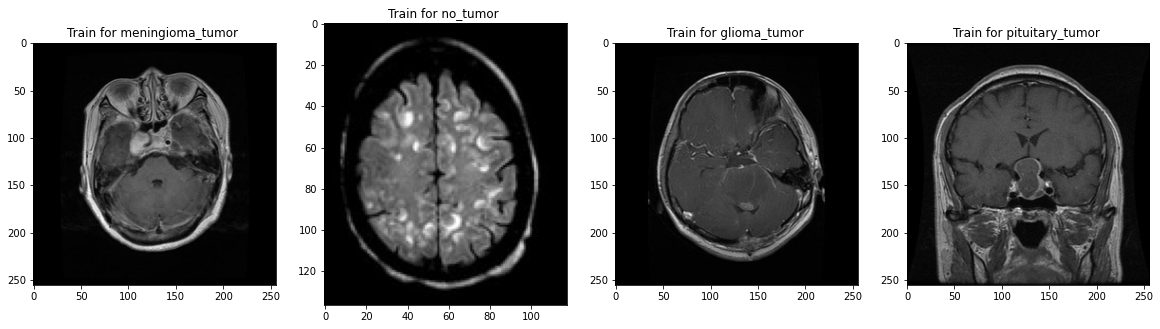

In [9]:
fig = plt.figure(figsize=(20,20))
plt.gray()  # show the filtered result in grayscale
subplots=[]
subplots.append(fig.add_subplot(141))
subplots.append(fig.add_subplot(142))
subplots.append(fig.add_subplot(143))
subplots.append(fig.add_subplot(144))

for i in range(len(categories)):
    subplots[i].set_title(f'Train for {categories[i]} ')
    subplots[i].imshow(train[categories[i]]["data"][0])
##que podemos ver ahi?  imagenes de diferente tamaño, orientacion de la cabeza diferente, is not skull stripped
## looks like a different weighted w1,w2 flat, sugerir usar https://github.com/ANTsX/ANTs
## hablar de data augmentation

In [ ]:
train = preprocess(train)

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.gray()  # show the filtered result in grayscale
subplots=[]
subplots.append(fig.add_subplot(141))
subplots.append(fig.add_subplot(142))
subplots.append(fig.add_subplot(143))
subplots.append(fig.add_subplot(144))

for i in range(len(categories)):
    subplots[i].set_title(f'Train for {categories[i]} ')
    subplots[i].imshow(train[categories[i]]["data"][0])

# Sugerir Ants
es sugerido pero toma mucho tiempo, por eso no lo vamos a hacer en este tutorial

In [ ]:
test = get_dataset_original("testing")

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.gray()  # show the filtered result in grayscale
subplots=[]
subplots.append(fig.add_subplot(141))
subplots.append(fig.add_subplot(142))
subplots.append(fig.add_subplot(143))
subplots.append(fig.add_subplot(144))

for i in range(len(categories)):
    subplots[i].set_title(f'Train for {categories[i]} ')
    subplots[i].imshow(test[categories[i]]["data"][0])

In [ ]:
test = preprocess(test)

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.gray()  # show the filtered result in grayscale
subplots=[]
subplots.append(fig.add_subplot(141))
subplots.append(fig.add_subplot(142))
subplots.append(fig.add_subplot(143))
subplots.append(fig.add_subplot(144))

for i in range(len(categories)):
    subplots[i].set_title(f'Train for {categories[i]} ')
    subplots[i].imshow(test[categories[i]]["data"][0])

# Saving the preprocessed dataset

In [ ]:
save_dataset_preprocessed(train,"training")

In [ ]:
save_dataset_preprocessed(test,"testing")

### Come back to the index

Lets come back to the index to continue with the tutorial.
* [Index](index.ipynb)